In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#from google.colab.patches import cv2_imshow

In [6]:
image_path='images/download9.jpg'

In [7]:
image=cv2.imread(image_path)
input_copy=image.copy()
org_image =cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_gray = cv2.threshold(org_image, 127, 255, cv2.THRESH_BINARY_INV)[1]

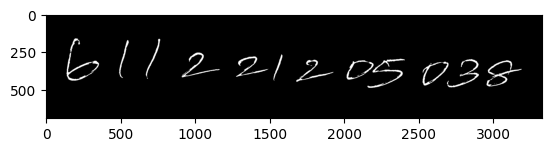

In [8]:
plt.imshow(img_gray, cmap='gray')

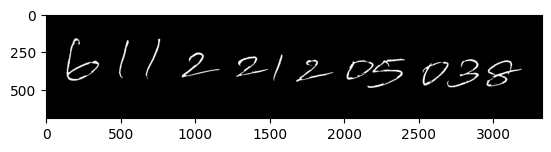

In [9]:
inverted_image = cv2.bitwise_not(img_gray)
kernel =np.ones((5,5), np.uint8)
img_morphex = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
img_morphex= cv2.bitwise_not(img_morphex)
plt.imshow(img_morphex, cmap='gray')

In [10]:
contours, hierarchy = cv2.findContours(img_morphex, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(image.shape)
image_copy=img_morphex.copy()
cv2.imshow('image', img_morphex)
#cv2.imshow("Current Crop", img_morphex)
cv2.waitKey(0)
cv2.destroyAllWindows()

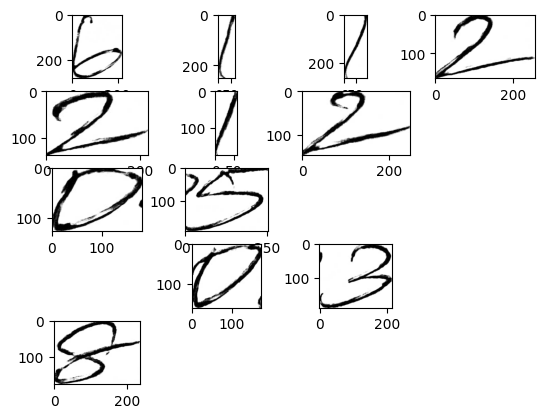

In [12]:
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
for _, c in enumerate(contours):

    boundRect = cv2.boundingRect(c)

    # Get the bounding rectangle data:
    #rectX = boundRect[0]
    #rectY = boundRect[1]
    #rectWidth = boundRect[2]
    #rectHeight = boundRect[3]
    rectX, rectY, rectWidth, rectHeight = boundRect


    rectArea = rectWidth * rectHeight

    minArea=500
    if rectArea > minArea :
        color = (0, 255, 0)
        cv2.rectangle(input_copy, (int(rectX), int(rectY)),(int(rectX + rectWidth), int(rectY + rectHeight)),color,  1)
        cv2.imshow("input image",input_copy)
        currentCrop = image[rectY:rectY+rectHeight,rectX:rectX+rectWidth]


        cv2.imwrite(f'images/rec/{_}.jpg', currentCrop)

        plt.subplot(5,4, _+1)
        plt.imshow(currentCrop)

        cv2.imshow("Current Crop", currentCrop)
        #cv2_imshow(currentCrop)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()